<a href="https://colab.research.google.com/github/rmcelfresh/IST718Lab9/blob/master/McElfresh_Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install -q xlrd
# import packages for analysis and modeling
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
!python3.6 -m pip install scipy==1.2 --upgrade
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting

import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING

#from pyvttbl import DataFrame # Anova
from scipy import stats
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn import linear_model
from shapely.geometry import Point, Polygon
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

Requirement already up-to-date: scipy==1.2 in /usr/local/lib/python3.6/dist-packages (1.2.0)


In [30]:
!pip install mnist
!pip install python-mnist

Installing the needed files
Importing the py file needed to read the fashion mnist docs

In [0]:
#import "content/fashion-mnist/utils/mnist_reader.py"

In [33]:
#cloning the git hub dist for fashion mnist
!git clone https://github.com/zalandoresearch/fashion-mnist.git


fatal: destination path 'fashion-mnist' already exists and is not an empty directory.


In [0]:
#couldn't figure out how to access this from the nested file so I downloaded and reuploaded the file to the main directory
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')


In [35]:
#making sure the sizes make sense
#x=the pixel detail, y = label
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [36]:
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))


Rows: 60000, columns: 784


In [37]:
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))


Rows: 10000, columns: 784


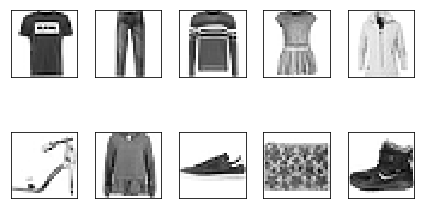

In [38]:
#looking at one of each type of clothing-- off the bat I think the different types of shirts/tops and different types of shoes will be tough to distingush between

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_all.png', dpi=300)
plt.show()


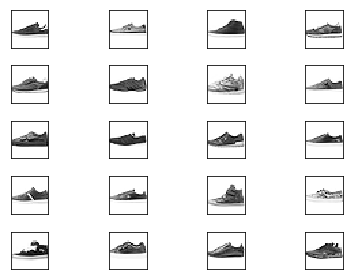

In [94]:
# VISUALIZE DIFFERENT VARIATIONS OF Sandals

fig, ax = plt.subplots(nrows=5, ncols=4, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(20):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_9.png', dpi=300)
plt.show()


In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt


In [0]:
#random forest code adopted from https://www.kaggle.com/atorin/mnist-digit-recognition-with-random-forests
from sklearn.ensemble import RandomForestClassifier


In [0]:
#building my initial classifier
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=10)


In [43]:
#fitting the classifier to the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [104]:
%%time
#building my initial classifier
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=10)

#fitting the classifier to the training data
rfc.fit(X_train, y_train)
#scoring the classifier on the test data--not bad for no tuning
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))
#we have massive overfitting...
#0.8556

0.9951166666666666
0.8517
CPU times: user 13.6 s, sys: 95 ms, total: 13.7 s
Wall time: 7.2 s


next I tried several different classifier set ups to see what worked best considering processing time

In [45]:

%%time 
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=20)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))
#0.8671

0.9989833333333333
0.8652
CPU times: user 28.7 s, sys: 33.9 ms, total: 28.7 s
Wall time: 14.8 s


In [46]:

%%time
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=50)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))
#0.8731 best mix of time to run and predictive power

0.9999333333333333
0.8744
CPU times: user 1min 10s, sys: 97.9 ms, total: 1min 10s
Wall time: 35.9 s


In [47]:
%%time
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=100)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))
#0.8752 --marginal improvement for significantly longer processing time

1.0
0.8736
CPU times: user 2min 19s, sys: 175 ms, total: 2min 19s
Wall time: 1min 11s


In [48]:
%%time
#trying to manipulate other variables
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=50, criterion = "entropy")
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))
#0.8768 best mix of time to run and predictive power

0.9999666666666667
0.8749
CPU times: user 1min 28s, sys: 131 ms, total: 1min 28s
Wall time: 45.1 s


In [51]:
#building my confusion matrix
predictions = rfc.predict(X_test)
predictions[4]
np.argmax(predictions[0])
#test_labels[0]


print(predictions)

[9 2 1 ... 8 1 5]


In [0]:
#didn't end up using this here--used below
Image=[]
Pred=[]
TrueLabel=[]
Images=np.array([np.arange(10000)]*1).T
for i in Images:
    Image.append(i)
    predictions[i]
    TrueLabel.append(y_test[i])

In [53]:
print(len(y_test),
len(predictions),
len(TrueLabel))

10000 10000 10000


In [54]:
#building dataframe for confusion matrix
d = {'Image':Image, "Prediction": predictions, "TrueLabel": y_test}
df= pd.DataFrame(d)
df.head()

,Image,Prediction,TrueLabel
0,[0],9,9
1,[1],2,2
2,[2],1,1
3,[3],1,1
4,[4],6,6


In [0]:
df.to_csv('RandomForestfinalPred.csv')

In [0]:
#tensor flow code adopted from https://www.tensorflow.org/tutorials/keras/basic_classification

In [57]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.13.1


In [58]:
#pulling in the same data as before but from a different source--not really necessary

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [0]:
#storing the class names to use later
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [60]:
#again confirming my table sizes=looks right (28x28 is pixel size of each image)
print(train_images.shape)
print(len(train_labels))


(60000, 28, 28)
60000


In [61]:
print(test_images.shape)
print(len(test_labels))

(10000, 28, 28)
10000


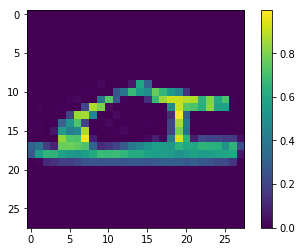

In [103]:
#demonstrating what the pics look like in terms of pixel darkness--these will be changed to B&W for actual processing
plt.figure()
plt.imshow(train_images[120])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

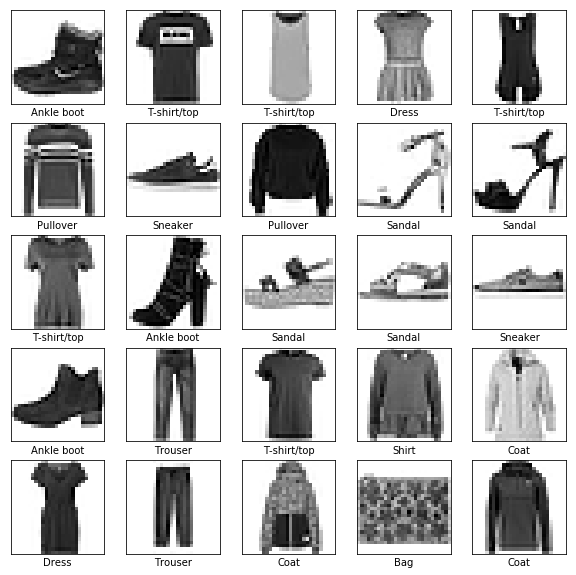

In [64]:
#looking at an assortment of different varities of clothing included in the dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [65]:

%%time 
#building my model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.
CPU times: user 64.7 ms, sys: 31.9 ms, total: 96.6 ms
Wall time: 79.1 ms


In [66]:
%%time 
#compliling the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

CPU times: user 106 ms, sys: 996 µs, total: 107 ms
Wall time: 117 ms


In [105]:
%%time 
#initial run w/ ten epochs
history  = model.fit(train_images, train_labels, validation_data=(test_images,test_labels), epochs=10, batch_size=1000, verbose=2)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 0s - loss: 0.0084 - acc: 0.9983 - val_loss: 0.7643 - val_acc: 0.8866
Epoch 2/10
 - 0s - loss: 0.0050 - acc: 0.9996 - val_loss: 0.7679 - val_acc: 0.8872
Epoch 3/10
 - 0s - loss: 0.0047 - acc: 0.9996 - val_loss: 0.7632 - val_acc: 0.8862
Epoch 4/10
 - 0s - loss: 0.0044 - acc: 0.9997 - val_loss: 0.7632 - val_acc: 0.8866
Epoch 5/10
 - 0s - loss: 0.0042 - acc: 0.9998 - val_loss: 0.7655 - val_acc: 0.8872
Epoch 6/10
 - 0s - loss: 0.0040 - acc: 0.9998 - val_loss: 0.7713 - val_acc: 0.8867
Epoch 7/10
 - 0s - loss: 0.0044 - acc: 0.9997 - val_loss: 0.7755 - val_acc: 0.8864
Epoch 8/10
 - 0s - loss: 0.0039 - acc: 0.9998 - val_loss: 0.7725 - val_acc: 0.8873
Epoch 9/10
 - 0s - loss: 0.0036 - acc: 0.9999 - val_loss: 0.7753 - val_acc: 0.8869
Epoch 10/10
 - 0s - loss: 0.0045 - acc: 0.9996 - val_loss: 0.7762 - val_acc: 0.8870
CPU times: user 4.68 s, sys: 258 ms, total: 4.93 s
Wall time: 4.12 s


In [106]:
history

In [68]:
%%time 
#second run with 300 epochs
history  = model.fit(train_images, train_labels, validation_data=(test_images,test_labels), epochs=300, batch_size=1000, verbose=2)


Train on 60000 samples, validate on 10000 samples
Epoch 1/300
 - 0s - loss: 0.2066 - acc: 0.9239 - val_loss: 0.3111 - val_acc: 0.8900
Epoch 2/300
 - 0s - loss: 0.1941 - acc: 0.9287 - val_loss: 0.3093 - val_acc: 0.8917
Epoch 3/300
 - 0s - loss: 0.1910 - acc: 0.9294 - val_loss: 0.3084 - val_acc: 0.8911
Epoch 4/300
 - 0s - loss: 0.1894 - acc: 0.9301 - val_loss: 0.3068 - val_acc: 0.8922
Epoch 5/300
 - 0s - loss: 0.1880 - acc: 0.9304 - val_loss: 0.3074 - val_acc: 0.8940
Epoch 6/300
 - 0s - loss: 0.1868 - acc: 0.9314 - val_loss: 0.3070 - val_acc: 0.8940
Epoch 7/300
 - 0s - loss: 0.1858 - acc: 0.9313 - val_loss: 0.3064 - val_acc: 0.8940
Epoch 8/300
 - 0s - loss: 0.1848 - acc: 0.9322 - val_loss: 0.3062 - val_acc: 0.8934
Epoch 9/300
 - 0s - loss: 0.1841 - acc: 0.9321 - val_loss: 0.3066 - val_acc: 0.8939
Epoch 10/300
 - 0s - loss: 0.1833 - acc: 0.9323 - val_loss: 0.3055 - val_acc: 0.8946
Epoch 11/300
 - 0s - loss: 0.1829 - acc: 0.9330 - val_loss: 0.3054 - val_acc: 0.8938
Epoch 12/300
 - 0s - los

In [108]:
#evaluating test accuracy of final epcoh. Obviously the model was overfitting the test dat (99% accuracy there to 88% here)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)
#Test accuracy: 0.8872 --suggests overfitting of training model :/


10000/10000 [==============================] - 0s 48us/sample - loss: 0.7762 - acc: 0.8870
Test accuracy: 0.887


In [0]:
#generating my predictions
predictions = model.predict(test_images)


In [71]:
#looking at a prediction for the first image-- it is going through and ranking the likilhood that it is 0-9, whichever is highest is choosen as the actual prediction
predictions[0]

array([3.6594289e-28, 4.3860964e-22, 5.9990771e-25, 1.4592626e-27,
       9.1803270e-32, 4.4268959e-13, 4.1141676e-22, 1.1060441e-08,
       1.3176668e-17, 1.0000000e+00], dtype=float32)

In [72]:
np.argmax(predictions[0])


9

In [73]:
#comparing our prediction to the actual value
test_labels[0]


9

In [0]:
#creating a graph to show the predictions for  images

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

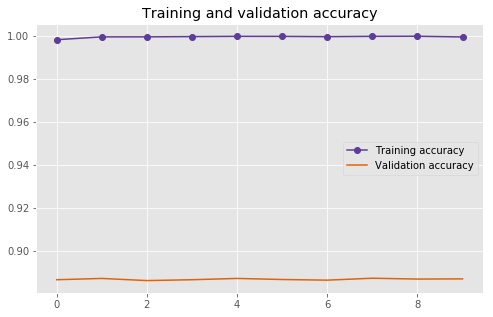

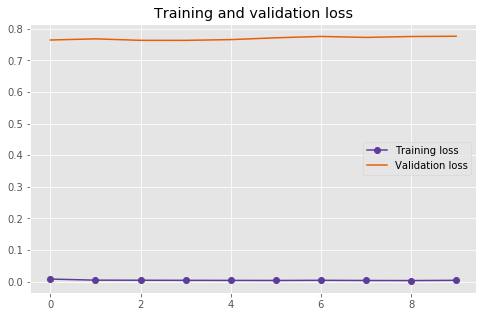

In [109]:
def plot_train_curve(history):
    colors = ['#e66101','#fdb863','#b2abd2','#5e3c99']
    accuracy = history.history['acc']
    val_accuracy = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    with plt.style.context("ggplot"):
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, accuracy, marker='o', c=colors[3], label='Training accuracy')
        plt.plot(epochs, val_accuracy, c=colors[0], label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, loss, marker='o', c=colors[3], label='Training loss')
        plt.plot(epochs, val_loss, c=colors[0], label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        plt.show()
    
plot_train_curve(history)

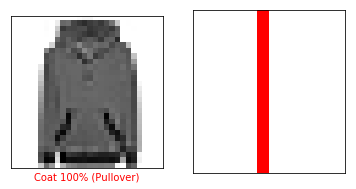

In [75]:
#sometimes even if we're sure it's one--it isn't....
i = 9441
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

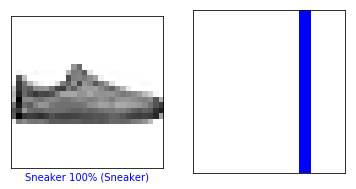

In [76]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


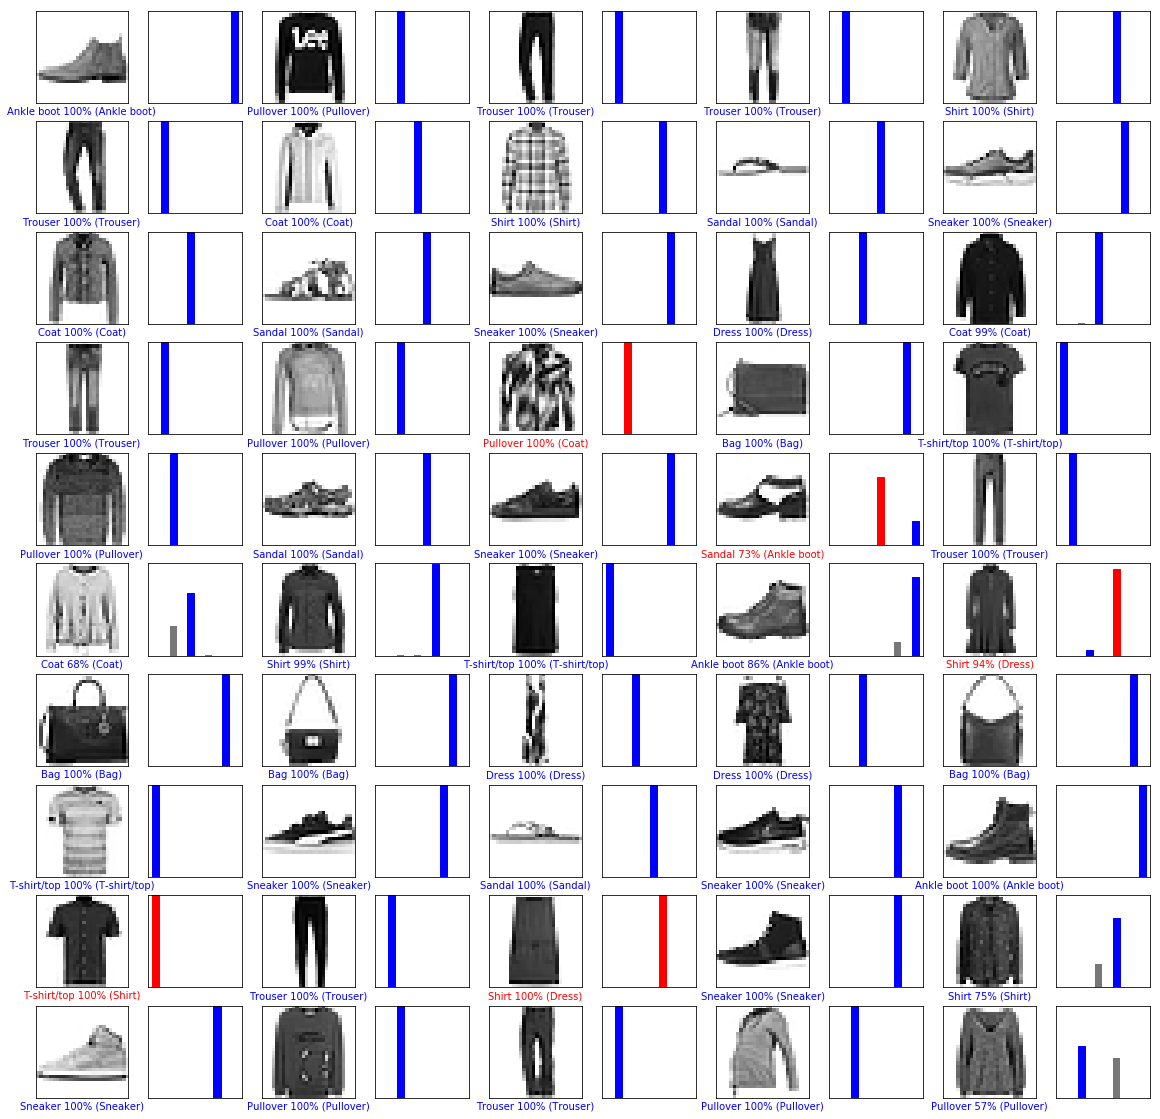

In [77]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red, gray= unsure
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [78]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [79]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [80]:
predictions_single = model.predict(img)

print(predictions_single)


[[3.6594147e-28 4.3860964e-22 5.9990771e-25 1.4592513e-27 9.1803969e-32
  4.4268959e-13 4.1141050e-22 1.1060462e-08 1.3176618e-17 1.0000000e+00]]


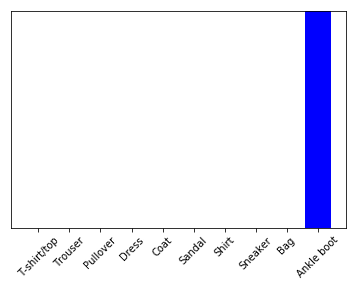

In [81]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


In [82]:
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]



9

In [0]:
#creating a loop to make a confusion matrix-- only selecting the "best guess" for the prediction value
Image=[]
Pred=[]
TrueLabel=[]
Images=np.array([np.arange(10000)]*1).T
for i in Images:
    Image.append(i)
    predictions[i]
    Pred.append(np.argmax(predictions[i]))
    TrueLabel.append(test_labels[i])

In [84]:
len(Pred)
len(Images)
len(TrueLabel)

10000

In [0]:
d = {'Image':Image, "Prediction":Pred, "TrueLabel":TrueLabel}

In [0]:
df=pd.DataFrame(d)

In [87]:
df.head()

,Image,Prediction,TrueLabel
0,[0],9,[9]
1,[1],2,[2]
2,[2],1,[1]
3,[3],1,[1]
4,[4],6,[6]


In [0]:
#exporting dataframe to excel to make confusion matrix!
df.to_csv('finalPred.csv')